# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data=pd.merge(study_results, mouse_metadata, on= "Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_count = len(merged_data["Mouse ID"].value_counts())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

print("Duplicate Mouse IDs:", duplicate_mouse_ids)

Duplicate Mouse IDs: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_data = merged_data.drop_duplicates(subset='Mouse ID', keep='last')
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
Cleaned_mice_count = len(Cleaned_data["Mouse ID"].unique())
Cleaned_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary = merged_data.groupby("Drug Regimen")['Tumor Volume (mm3)']

# Calculating statistics for tumor volume
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': summary.mean(),
    'Median Tumor Volume': summary.median(),
    'Tumor Volume Variance': summary.var(),
    'Tumor Volume Std. Dev.': summary.std(),
    'Tumor Volume Std. Err.': summary.sem()
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
summary_stats_advanced = grouped.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats_advanced

NameError: name 'grouped' is not defined

## Bar and Pie Charts

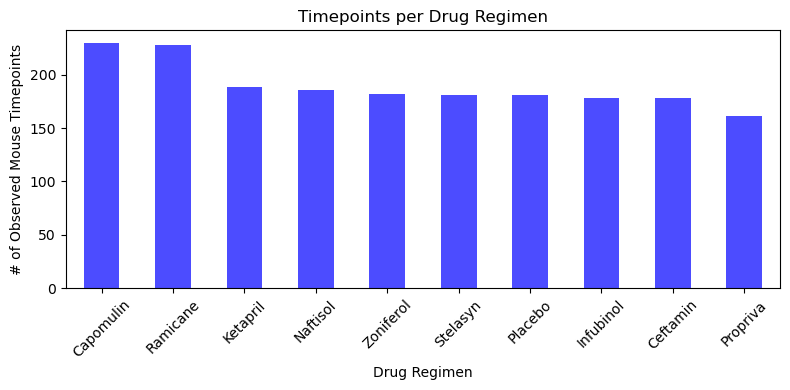

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = merged_data['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', figsize=(8, 4), color='blue', alpha=0.7)

plt.title('Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

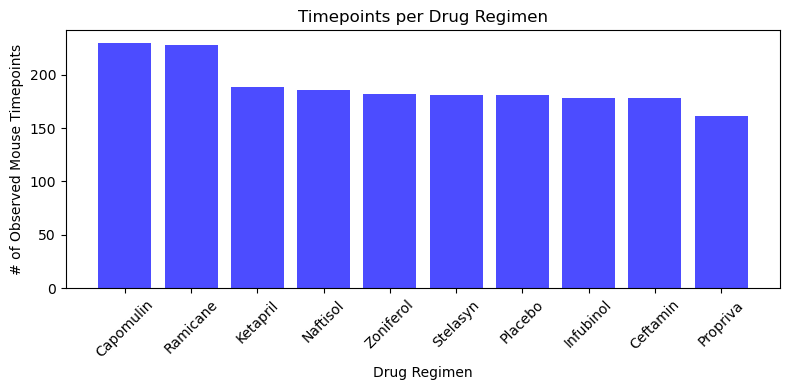

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_names = drug_counts.index.tolist()
counts = drug_counts.values.tolist()

plt.figure(figsize=(8,4))
plt.bar(drug_names, counts, color='blue', alpha=0.7)

plt.title('Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

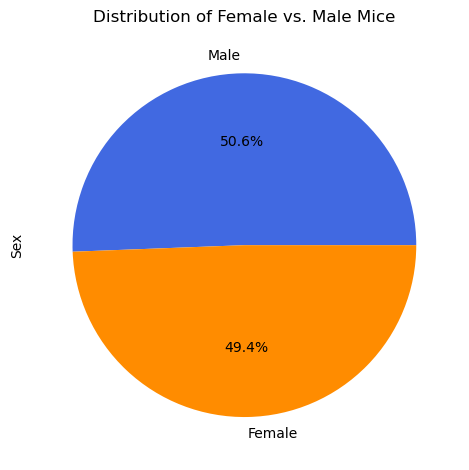

In [51]:
gender_distribution = round(merged_data['Sex'].value_counts())
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['royalblue', 'darkorange'], startangle=0)               
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')
plt.tight_layout()

plt.show()

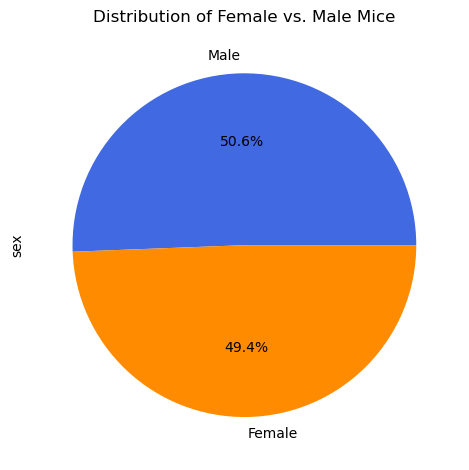

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['royalblue', 'darkorange'], startangle=0)
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('sex') 
plt.tight_layout()

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]

max_timepoint_per_mouse = filtered_data.groupby('Mouse ID')['Timepoint'].max()
final_tumor_volumes = merged_data.loc[merged_data['Timepoint'].isin(max_timepoint_per_mouse)]
final_tumor_volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'].isin(selected_regimens)]

# Displaying the final tumor volume of each mouse across the selected regimens
final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,b128,Capomulin,45.000000
1,b128,Capomulin,45.651331
2,b128,Capomulin,43.270852
3,b128,Capomulin,43.784893
4,b128,Capomulin,42.731552
...,...,...,...
1888,m601,Capomulin,33.118756
1889,m601,Capomulin,31.758275
1890,m601,Capomulin,30.834357
1891,m601,Capomulin,31.378045


In [23]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_per_mouse = merged_data.groupby('Mouse ID')['Timepoint'].max()

last_timepoint_per_mouse

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [26]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(merged_data, last_timepoint_per_mouse, on=['Mouse ID', 'Timepoint'])

#merged_last_timepoint[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
merged_last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
244,t565,45,34.455298,0,Capomulin,Female,20,17
245,i557,45,47.685963,1,Capomulin,Female,1,24
246,m957,45,33.329098,1,Capomulin,Female,3,19
247,f966,20,30.485985,0,Capomulin,Male,16,17


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged_data['Drug Regimen'].unique()

for treatment in treatments:
    treatment_data = merged_data.loc[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
# Determine outliers using upper and lower bounds
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
   
    if outliers.empty:
        print(f"{treatment}'s potential outliers: No outliers")
    else:
        print(f"{treatment}'s potential outliers:\n{outliers}")


Capomulin's potential outliers:
1699    25.472143
1700    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ketapril's potential outliers: No outliers
Naftisol's potential outliers: No outliers
Infubinol's potential outliers: No outliers
Stelasyn's potential outliers:
859    75.12369
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:
514    22.050126
Name: Tumor Volume (mm3), dtype: float64
Propriva's potential outliers:
1557    70.492788
1592    71.172463
1593    72.455421
1603    70.167749
Name: Tumor Volume (mm3), dtype: float64
Zoniferol's potential outliers: No outliers
Placebo's potential outliers: No outliers
Ceftamin's potential outliers: No outliers


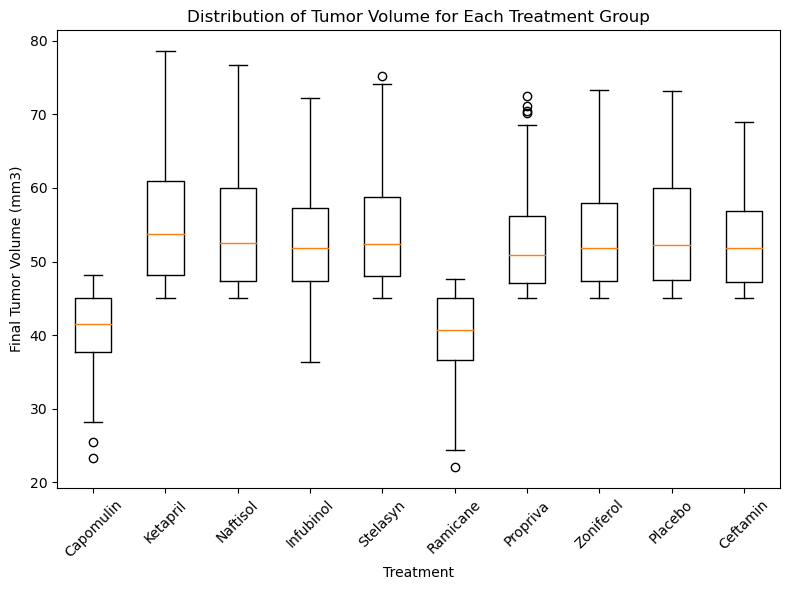

In [34]:
# Creating a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


## Line and Scatter Plots

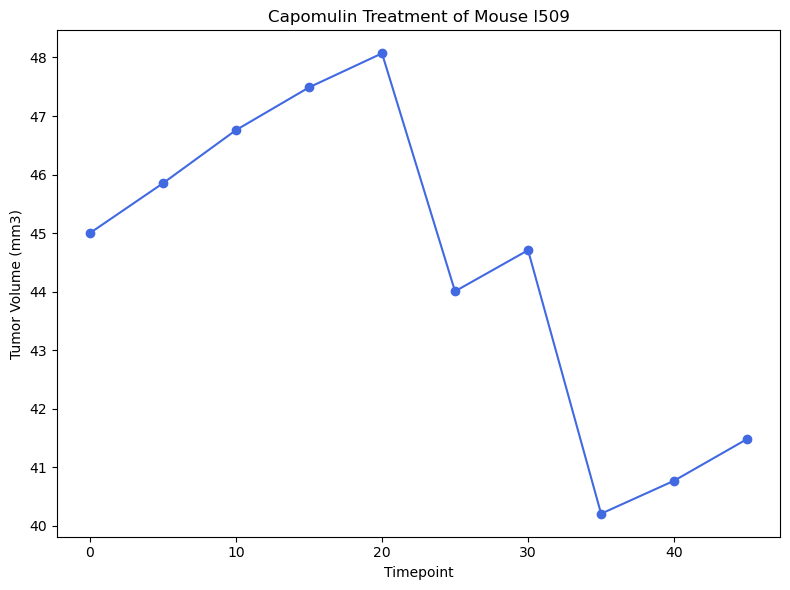

In [45]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data for the specific mouse treated with Capomulin
mouse_data = merged_data[(merged_data['Mouse ID'] == 'l509') & (merged_data['Drug Regimen'] == 'Capomulin')]

# Plotting tumor volume vs. time point for l509
plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='royalblue')

plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


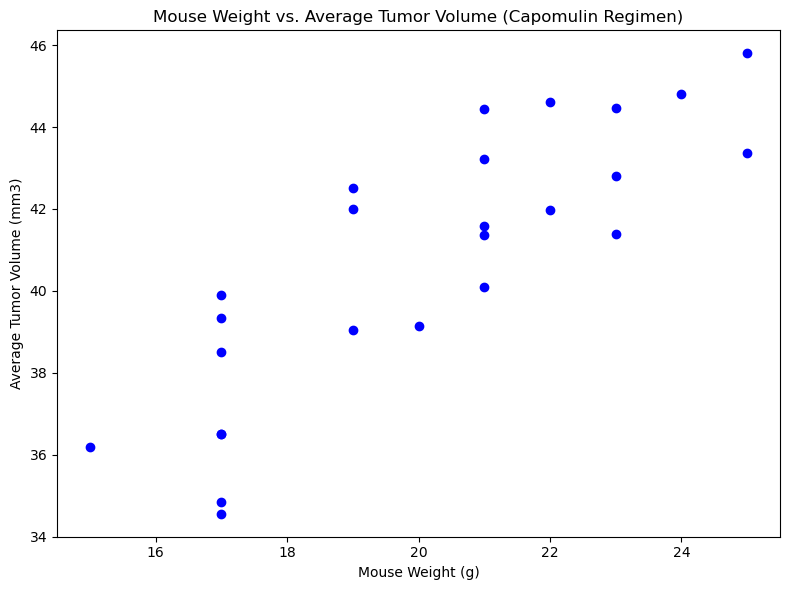

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Filter data for Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID to calculate average tumor volume and weight
avg_data = capomulin_data.groupby('Mouse ID').agg(
    Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Avg_Weight=('Weight (g)', 'mean')
).reset_index()


plt.figure(figsize=(8, 6))
plt.scatter(avg_data['Avg_Weight'], avg_data['Avg_Tumor_Volume'], marker='o', color='blue')


plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


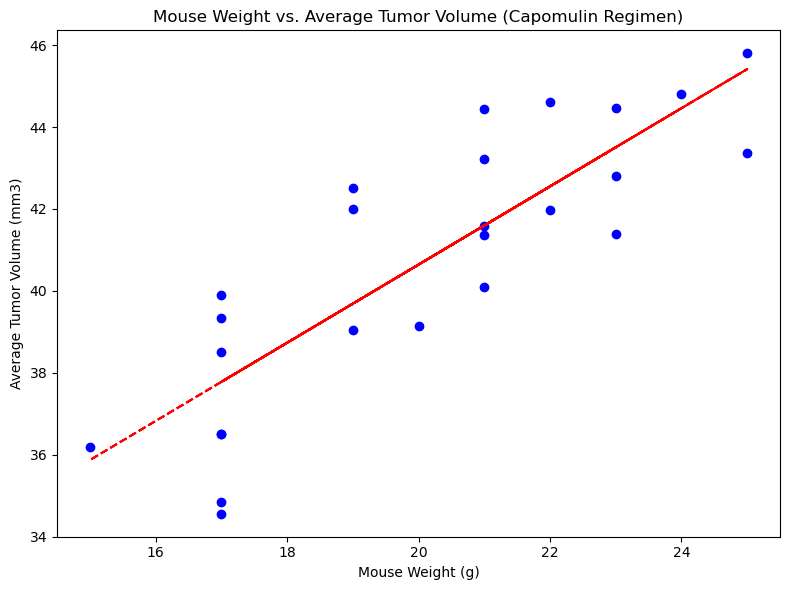

In [49]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress



correlation_coefficient = avg_data['Avg_Weight'].corr(avg_data['Avg_Tumor_Volume'])
slope, intercept, r_value, p_value, std_err = linregress(avg_data['Avg_Weight'], avg_data['Avg_Tumor_Volume'])

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(avg_data['Avg_Weight'], avg_data['Avg_Tumor_Volume'], marker='o', color='blue')


plt.plot(avg_data['Avg_Weight'], slope * avg_data['Avg_Weight'] + intercept, color='red', linestyle='--')


plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"Correlation Coefficient: {correlation_coefficient}")
plt.tight_layout()
plt.show()
